# Encoder / Decoder

<img src="img/encoder-decoder.png" style="width: 95%; margin-left: auto; margin-right: auto;"/>

# Transformer

<img src="img/transformer.png" style="width: 45%; margin-left: auto; margin-right: auto;"/>

## Multi-Head Attention

<img src="img/multi-head-attention.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

## Scaled Dot-Product Attention

<img src="img/scaled-dot-prod-attention.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

In [1]:
!nvidia-smi

Wed Oct  7 08:50:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 450.66       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  TITAN RTX           Off  | 00000000:01:00.0 Off |                  N/A |
| 41%   41C    P8    21W / 280W |    181MiB / 24217MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  TITAN RTX           Off  | 00000000:21:00.0 Off |                  N/A |
| 41%   

In [1]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

In [2]:
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Downloading: 100%|██████████| 0.99M/0.99M [00:00<00:00, 1.60MB/s]
Downloading: 100%|██████████| 446k/446k [00:00<00:00, 881kB/s]  
Downloading: 100%|██████████| 1.29M/1.29M [00:00<00:00, 1.97MB/s]
Downloading: 100%|██████████| 665/665 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 523M/523M [00:59<00:00, 9.17MB/s] 


In [3]:
ids = tokenizer.encode('This is an example of text, and')
ids

[1212, 318, 281, 1672, 286, 2420, 11, 290]

In [4]:
tokenizer.decode(ids)

'This is an example of text, and'

In [5]:
import torch

In [6]:
t = torch.LongTensor(ids).unsqueeze(0)
preds = model.generate(t)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [7]:
preds.shape, preds[0]

(torch.Size([1, 20]),
 tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
          922,  530,   13,  198,  198,  464,  717, 1517]))

In [8]:
tokenizer.decode(preds[0].numpy())

"This is an example of text, and it's not a good one.\n\nThe first thing"

In [9]:
preds[:, -10:]

tensor([[ 407,  257,  922,  530,   13,  198,  198,  464,  717, 1517]])

In [10]:
preds2 = model.generate(preds[:, -10:])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [11]:
torch.cat((preds[0, :-10], preds2[0]))

tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
         922,  530,   13,  198,  198,  464,  717, 1517,  314, 6810,  373,  326,
         262,  366,   40, 1101,  407,  257])

In [12]:
tokenizer.decode(torch.cat((preds[0, :-10], preds2[0])).numpy())

'This is an example of text, and it\'s not a good one.\n\nThe first thing I noticed was that the "I\'m not a'

In [13]:
from fastai.text.all import *

In [14]:
path = untar_data(URLs.WIKITEXT_TINY)
path.ls()

(#2) [Path('C:/Users/tc/.fastai/data/wikitext-2/test.csv'),Path('C:/Users/tc/.fastai/data/wikitext-2/train.csv')]

In [15]:
df_train = pd.read_csv(path/'train.csv', header=None)
df_valid = pd.read_csv(path/'test.csv', header=None)
df_train.head()

,0
0,"\n = 2013 – 14 York City F.C. season = \n \n The 2013 – 14 season was the <unk> season of competitive association football and 77th season in the Football League played by York City Football Club , a professional football club based in York , North Yorkshire , England . Their 17th @-@ place finish in 2012 – 13 meant it was their second consecutive season in League Two . The season ran from 1 July 2013 to 30 June 2014 . \n Nigel Worthington , starting his first full season as York manager , made eight permanent summer signings . By the turn of the year York were only above the relegation z..."
1,"\n = Big Boy ( song ) = \n \n "" Big Boy "" <unk> "" I 'm A Big Boy Now "" was the first single ever recorded by the Jackson 5 , which was released by Steeltown Records in January 1968 . The group played instruments on many of their Steeltown compositions , including "" Big Boy "" . The song was neither a critical nor commercial success , but the Jackson family were delighted with the outcome nonetheless . \n The Jackson 5 would release a second single with Steeltown Records before moving to Motown Records . The group 's recordings at Steeltown Records were thought to be lost , but they were re..."
2,"\n = The Remix ( Lady Gaga album ) = \n \n The Remix is a remix album by American recording artist Lady Gaga . Released in Japan on March 3 , 2010 , it contains remixes of the songs from her first studio album , The Fame ( 2008 ) , and her third extended play , The Fame Monster ( 2009 ) . A revised version of the track list was prepared for release in additional markets , beginning with Mexico on May 3 , 2010 . A number of recording artists have produced the songs , including Pet Shop Boys , Passion Pit and The Sound of Arrows . The remixed versions feature both uptempo and <unk> composit..."
3,"\n = New Year 's Eve ( Up All Night ) = \n \n "" New Year 's Eve "" is the twelfth episode of the first season of the American comedy television series Up All Night . The episode originally aired on NBC in the United States on January 12 , 2012 . It was written by Erica <unk> and was directed by Beth McCarthy @-@ Miller . The episode also featured a guest appearance from Jason Lee as Chris and Reagan 's neighbor and Ava 's boyfriend , Kevin . \n During Reagan ( Christina Applegate ) and Chris 's ( Will <unk> ) first New Year 's Eve game night , Reagan 's competitiveness comes out causing Ch..."
4,"\n = Geopyxis carbonaria = \n \n Geopyxis carbonaria is a species of fungus in the genus Geopyxis , family <unk> . First described to science in 1805 , and given its current name in 1889 , the species is commonly known as the charcoal loving elf @-@ cup , dwarf <unk> cup , <unk> <unk> cup , or pixie cup . The small , <unk> @-@ shaped fruitbodies of the fungus are reddish @-@ brown with a whitish fringe and measure up to 2 cm ( 0 @.@ 8 in ) across . They have a short , tapered stalk . Fruitbodies are commonly found on soil where brush has recently been burned , sometimes in great numbers ...."


In [16]:
all_texts = np.concatenate([df_train[0].values, df_valid[0].values])

In [17]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x):
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [18]:
splits = [range_of(df_train), list(range(len(df_train), len(all_texts)))]
tfmd_lists = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

Token indices sequence length is longer than the specified maximum sequence length for this model (4576 > 1024). Running this sequence through the model will result in indexing errors


In [19]:
tfmd_lists.train[0],tfmd_lists.valid[0]

(tensor([220, 198, 796,  ..., 198, 220, 198]),
 tensor([220, 198, 796,  ..., 198, 220, 198]))

In [20]:
tfmd_lists.tfms(tfmd_lists.train.items[0]).shape, tfmd_lists.tfms(tfmd_lists.valid.items[0]).shape

(torch.Size([4576]), torch.Size([1485]))

In [21]:
batch_size, seq_len = 6, 1024
dls = tfmd_lists.dataloaders(bs=batch_size, seq_len=seq_len)

In [22]:
dls.show_batch(max_n=2)

C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax = ax.append(pd.Series({label: o}))
C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax = ax.append(pd.Series({label: o}))
C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax = ax.append(pd.Series({label: o}))
C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pan

,text,text_
0,"\n = South of Heaven = \n \n South of Heaven is the fourth studio album by American thrash metal band Slayer. Released on July 5, 1988, the album was the band's second collaboration with record producer Rick Rubin, whose production skills on Slayer's previous album Reign in Blood had helped the band's sound evolve. \n South of Heaven was Slayer's second album to enter the Billboard 200, and its last to be released by Def Jam Recordings, although the album became an American Recordings album after Rick Rubin ended his partnership with Russell Simmons. It was one of only two Def Jam titles to be distributed by Geffen Records through Warner Bros. Records because of original distributor Columbia Records'refusal to release work by the band. The release peaked at number 57 and in 1992 was awarded a gold certification by the Recording Industry Association of America. \n In","\n = South of Heaven = \n \n South of Heaven is the fourth studio album by American thrash metal band Slayer. Released on July 5, 1988, the album was the band's second collaboration with record producer Rick Rubin, whose production skills on Slayer's previous album Reign in Blood had helped the band's sound evolve. \n South of Heaven was Slayer's second album to enter the Billboard 200, and its last to be released by Def Jam Recordings, although the album became an American Recordings album after Rick Rubin ended his partnership with Russell Simmons. It was one of only two Def Jam titles to be distributed by Geffen Records through Warner Bros. Records because of original distributor Columbia Records'refusal to release work by the band. The release peaked at number 57 and in 1992 was awarded a gold certification by the Recording Industry Association of America. \n In order"
1,"<unk> Jack, in which Nesbitt plays the leading role of Connor. He became involved in the film after reading an early script draft in 2006. In 2008, the global financial crisis severely reduced the budget of the film, and Nesbitt volunteered a reduction in his salary so the film could still be made. The film was shot over eight weeks in Melbourne in 2009 and released in 2010. \n Next, Nesbitt reunited with Occupation screenwriter Peter Bowker to star in the ITV medical drama series Monroe, playing Gabriel Monroe. Nesbitt was Bowker's first choice for the part. Nesbitt researched the role of the <unk> character by watching brain surgery being performed by Henry Marsh, and by consulting Philip Van <unk> at Leeds General <unk>. The series was filmed over 12 weeks in Leeds at the end of 2010 and broadcast on ITV during March and April 2011. Nesbitt will","unk> Jack, in which Nesbitt plays the leading role of Connor. He became involved in the film after reading an early script draft in 2006. In 2008, the global financial crisis severely reduced the budget of the film, and Nesbitt volunteered a reduction in his salary so the film could still be made. The film was shot over eight weeks in Melbourne in 2009 and released in 2010. \n Next, Nesbitt reunited with Occupation screenwriter Peter Bowker to star in the ITV medical drama series Monroe, playing Gabriel Monroe. Nesbitt was Bowker's first choice for the part. Nesbitt researched the role of the <unk> character by watching brain surgery being performed by Henry Marsh, and by consulting Philip Van <unk> at Leeds General <unk>. The series was filmed over 12 weeks in Leeds at the end of 2010 and broadcast on ITV during March and April 2011. Nesbitt will reprise"


In [23]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [24]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
    def decodes(self, x):
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [25]:
tfmd_lists = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tfmd_lists.dataloaders(bs=batch_size, seq_len=seq_len)

In [26]:
dls.show_batch(max_n=2)

C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax = ax.append(pd.Series({label: o}))
C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax = ax.append(pd.Series({label: o}))
C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax = ax.append(pd.Series({label: o}))
C:\Users\tc\Programming\Python\Anaconda3\envs\mlcourse\lib\site-packages\fastai\torch_core.py:475: FutureWarning: The series.append method is deprecated and will be removed from pan

,text,text_
0,"\n = Architecture of the Song dynasty = \n \n The architecture of the Song dynasty ( 960 – 1279 ) was noted for its towering Buddhist pagodas, enormous stone and wooden bridges, lavish tombs, and extravagant palaces. Although literary works on architecture existed beforehand, architectural writing <unk> during the Song dynasty, <unk> into a more professional form that described dimensions and working materials in a <unk>, organized manner. In addition to the examples still standing, depictions in Song artwork, architectural drawings, and illustrations in published books all aid modern historians in understanding the architecture of the period. \n The professions of architect, master craftsman, carpenter, and structural engineer did not have the high status of the Confucian scholar @-@ officials during the dynastic era. Architectural knowledge had been passed down orally for thousands of years, usually from craftsman fathers to their sons. There were also government agencies and","\n = Architecture of the Song dynasty = \n \n The architecture of the Song dynasty ( 960 – 1279 ) was noted for its towering Buddhist pagodas, enormous stone and wooden bridges, lavish tombs, and extravagant palaces. Although literary works on architecture existed beforehand, architectural writing <unk> during the Song dynasty, <unk> into a more professional form that described dimensions and working materials in a <unk>, organized manner. In addition to the examples still standing, depictions in Song artwork, architectural drawings, and illustrations in published books all aid modern historians in understanding the architecture of the period. \n The professions of architect, master craftsman, carpenter, and structural engineer did not have the high status of the Confucian scholar @-@ officials during the dynastic era. Architectural knowledge had been passed down orally for thousands of years, usually from craftsman fathers to their sons. There were also government agencies and schools"
1,"by the lack of space between the video cards forces researchers using the <unk> II to keep the side panel door open, so that the video cards can get regular air, decreasing the overall temperature inside the case. \n Due to the number of GPUs in the system, its initial boot was unsuccessful. This was because its motherboard uses a 32 bit BIOS, which only had approximately 3 GB of address space for the video cards. However, Asus managed to provide them a specialized BIOS that entirely <unk> the address space allocation of the GTX 295 video cards. The BIOS @-@ replacement <unk> was not tested. \n All seven PCI Express x16 slots in the Asus <unk> motherboard were used in the building of the Fastra II computer. However, the video cards in the Fastra II are wide enough to require two such slots each. To solve this issue,","the lack of space between the video cards forces researchers using the <unk> II to keep the side panel door open, so that the video cards can get regular air, decreasing the overall temperature inside the case. \n Due to the number of GPUs in the system, its initial boot was unsuccessful. This was because its motherboard uses a 32 bit BIOS, which only had approximately 3 GB of address space for the video cards. However, Asus managed to provide them a specialized BIOS that entirely <unk> the address space allocation of the GTX 295 video cards. The BIOS @-@ replacement <unk> was not tested. \n All seven PCI Express x16 slots in the Asus <unk> motherboard were used in the building of the Fastra II computer. However, the video cards in the Fastra II are wide enough to require two such slots each. To solve this issue, the"


In [27]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.learn.pred[0]

In [28]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [29]:
learn.validate()

(#2) [3.2636380195617676,26.14447784423828]

SuggestedLRs(valley=7.585775892948732e-05)

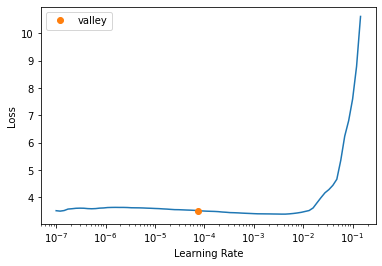

In [30]:
learn.lr_find()

In [32]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,3.680609,3.263556,26.142347,02:40


In [33]:
df_valid.head(1)

,0
0,"\n = Tropical Storm <unk> ( 2008 ) = \n \n Tropical Storm <unk> was the tenth tropical storm of the 2008 Atlantic hurricane season . <unk> developed out of a strong tropical wave which moved off the African coast on August 31 . The wave quickly became organized and was declared Tropical Depression Ten while located 170 mi ( 270 km ) to the south @-@ southeast of the Cape Verde Islands on September 2 . The depression was quickly upgraded to Tropical Storm <unk> around noon the same day . Over the next several days , <unk> moved in a general west @-@ northwest direction and reached its peak..."


In [34]:
prompt = "\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn"

In [48]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 21])

In [49]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [50]:
preds[0]

tensor([  198,   796, 39481,   796,   220,   198,   220,   198,   317, 44986,
          318,   257, 10883,  7185,   351,   257, 27223,  7894,   290,   257,
        12718,   319,   663,  1182,    13,   198,   198,    32, 44986,   318,
          257, 10883,  7185,   351,   257, 27223,  7894,   290,   257, 12718],
       device='cuda:0')

In [51]:
tokenizer.decode(preds[0].cpu().numpy())

'\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn on its head.\n\nA unicorn is a magical creature with a rainbow tail and a horn'